In [1]:
%load_ext autoreload
%autoreload 2

import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import ctvis

In [2]:
p = glob('public_covid_data/rp_im/*')
df = ctvis.get_df_all3()
index = 4
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [3]:
volume_gray = ctvis.hu_to_gray(volume)

In [4]:
overlayed = ctvis.overlay(volume_gray, mask, mask_color, alpha=0.7)

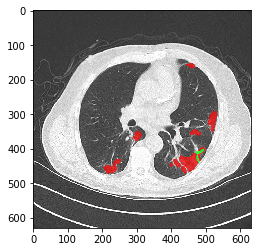

In [5]:
plt.imshow(overlayed[:, :, 30])


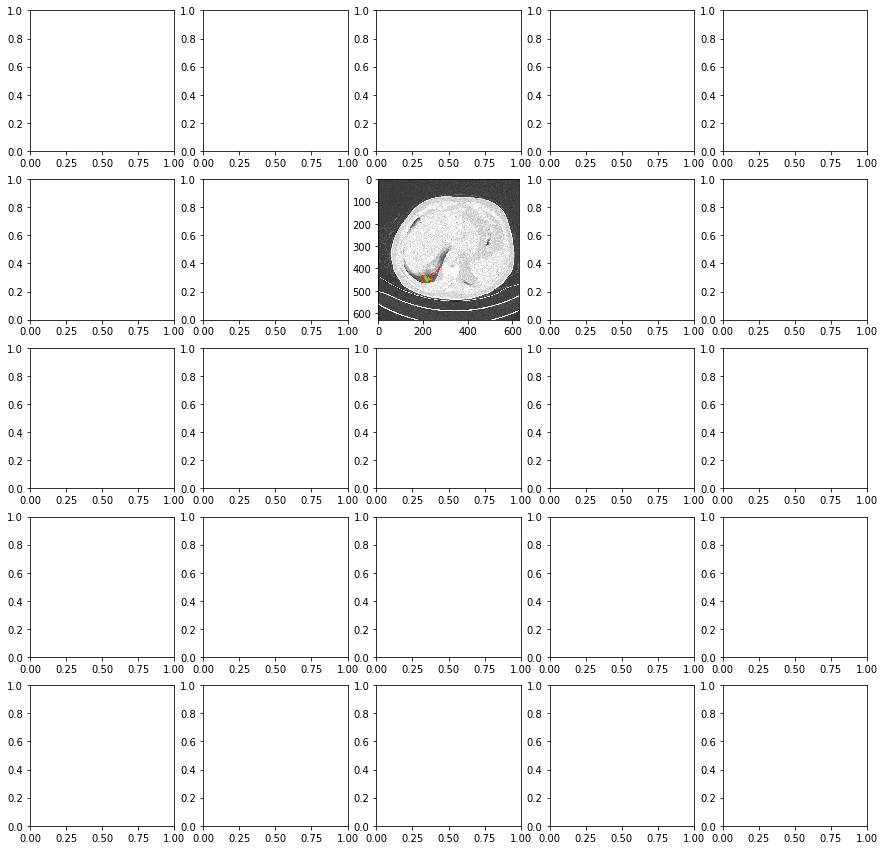

In [6]:
rows = 5
cols = 5
figsize = (15, 15)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
ax[1, 2].imshow(overlayed[:, :, 10])

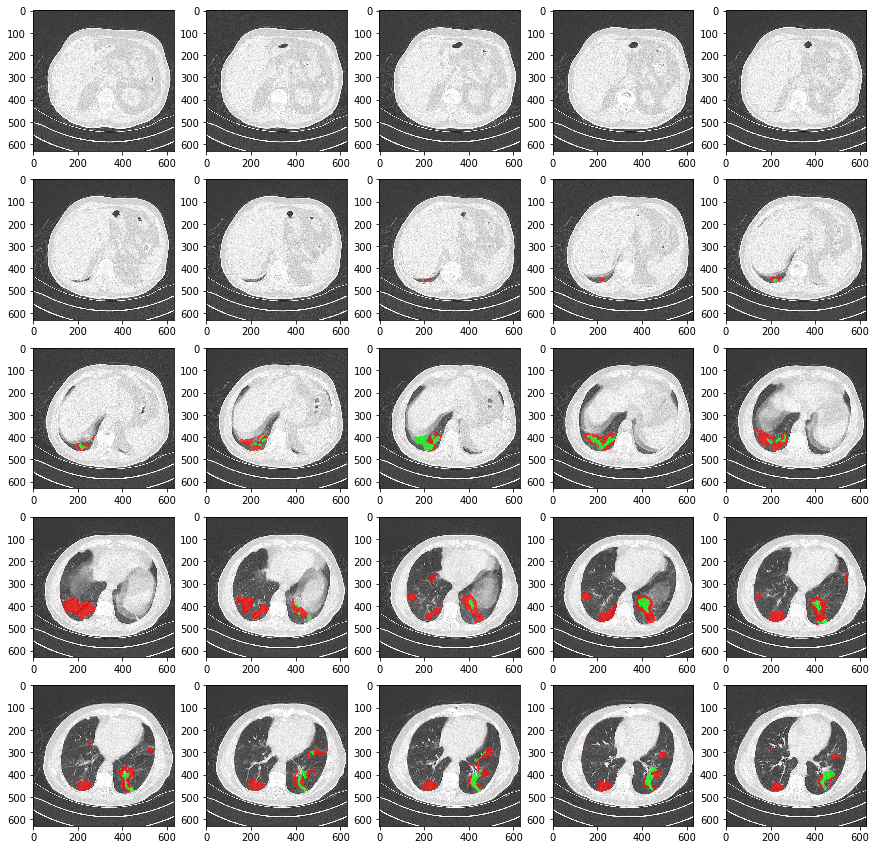

In [7]:
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for i in range(25):
    row_i = i // cols
    col_i = i % cols
    ax[row_i, col_i].imshow(overlayed[:, :, i])

In [8]:
 overlayed.shape

(630, 630, 66, 3)

In [9]:
 overlayed.shape[-2]

66

In [10]:
display_num = 25
cols = 5

In [11]:
display_num // cols + 1

6

In [12]:
total_num = overlayed.shape[-2]
total_num / display_num

2.64

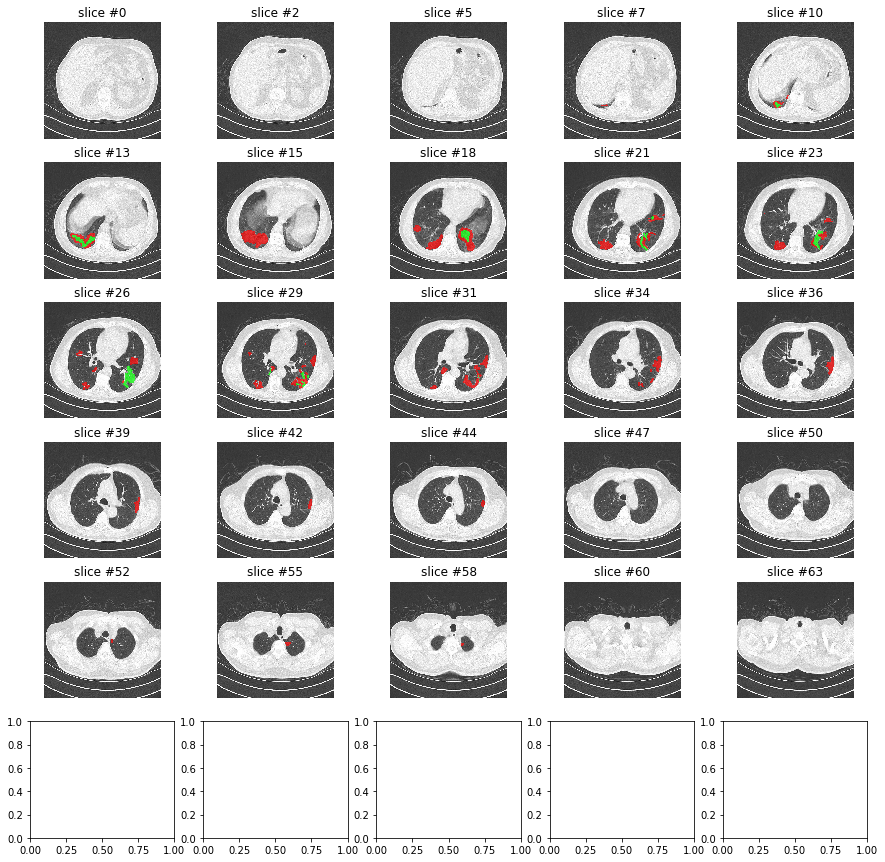

In [14]:
# 表示数
display_num = 25

# 行数
cols = 5

# 列数 全体の表示数から行数であまりなしで割って+1
row = display_num // cols + 1

# (630, 630, 66, 3) の後ろから２個目が枚数
total_num = overlayed.shape[-2]

# 表示する画像の感覚を　全体の枚数から表示したい枚数を割るが、0.xxとかだと0になるのでその場合1を設定する
interval = total_num / display_num
if interval < 1:
    interval = 1

# 画像のサイズ
figsize= (15, 15)
fig, ax = plt.subplots(row, cols, figsize=figsize)


for i in range(25):
    row_i = i // cols
    col_i = i % cols
    # 表示する画像を設定
    idx = int(i * interval)
    
    #　インデックス数がが総数を上回った場合に抜ける
    if idx >= total_num:
            break
    ax[row_i, col_i].imshow(overlayed[:, :, idx])
    ax[row_i, col_i].set_title(f'slice #{idx}')
    # メモリの削除
    ax[row_i, col_i].axis('off')

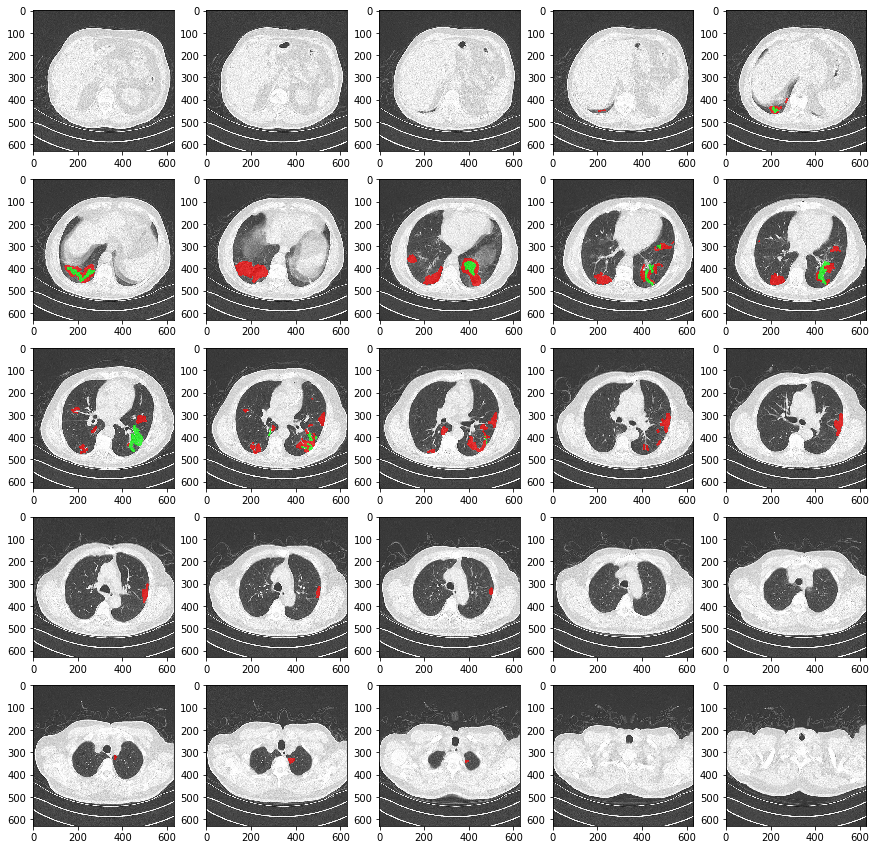

In [41]:
ctvis.vis_overlay(overlayed)

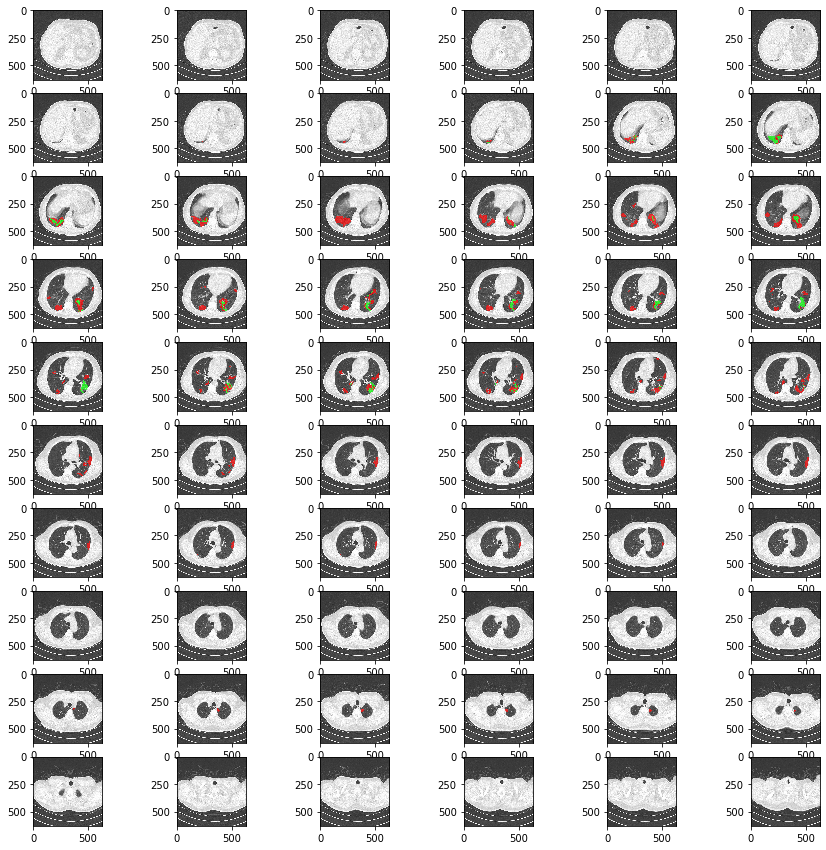

In [40]:
ctvis.vis_overlay(overlayed, display_num=60, cols=6)

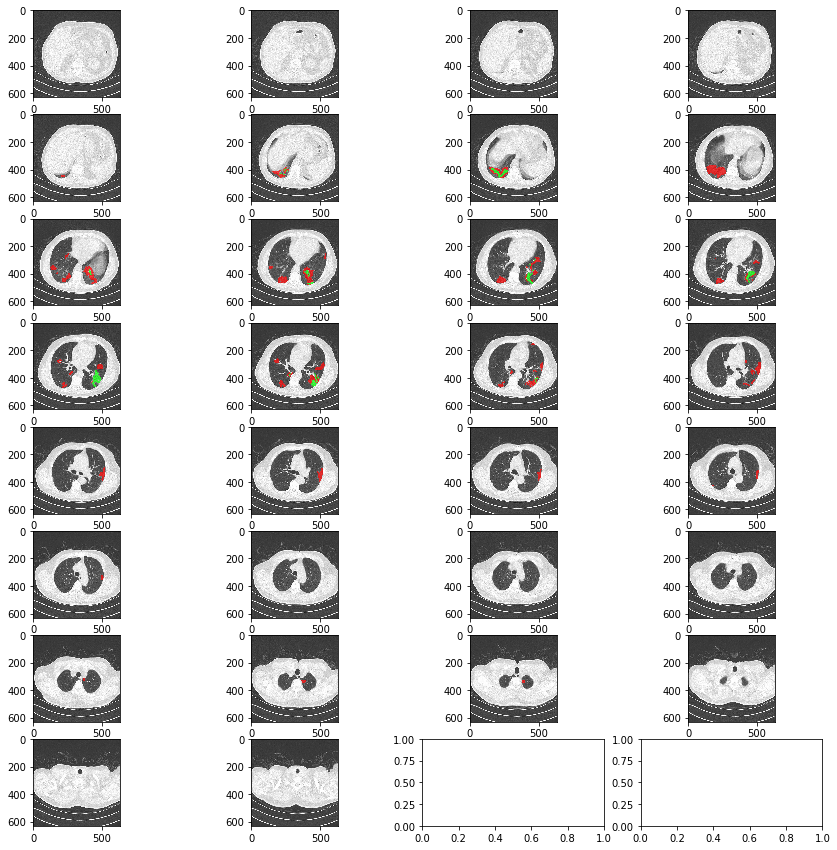

In [42]:
ctvis.vis_overlay(overlayed, display_num=30, cols=4)

In [15]:
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])

In [16]:
mask.shape

(630, 630, 66)

In [17]:
volume.shape

(630, 630, 66)

In [20]:
# np.where(mask == 1, True, False)
filter_ = np.equal(mask, 1)

In [30]:
# roi: reagion of interest

label_dict = {1: 'ggo', 2: 'consolidation', 3: 'effusion'}
result = {}
for label in label_dict.keys():
    # labelを設定
    prefix = label_dict[label]
    
    roi_hu = volume[np.equal(mask, label)]

    result[prefix + '_mean'] = np.mean(roi_hu)
    result[prefix + '_std']  = np.std(roi_hu)


In [31]:
result

{'ggo_mean': -564.0153386284383,
 'ggo_std': 178.14369036090986,
 'consolidation_mean': -318.87958459032524,
 'consolidation_std': 202.1461504135469,
 'effusion_mean': nan,
 'effusion_std': nan}

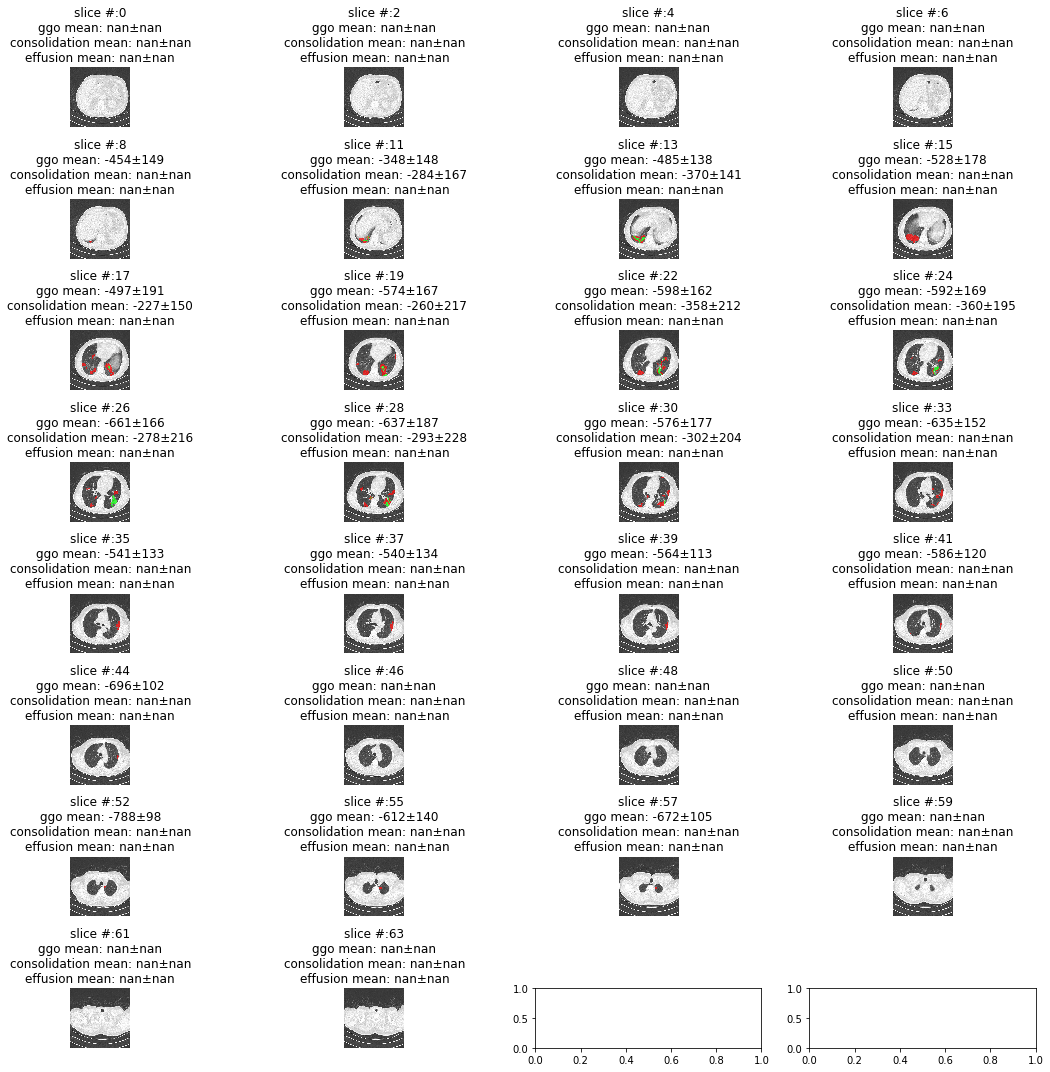

In [43]:
ctvis.vis_overlay(overlayed, volume, mask, display_num=30, cols=4)

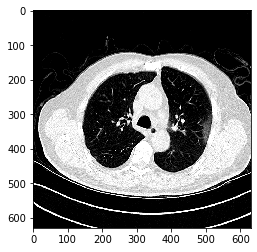

In [46]:
volume_clip = np.clip(volume, -900, 100)
plt.imshow(volume_clip[:, :, 40], cmap='gray')

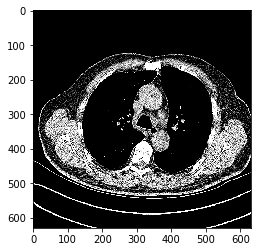

In [47]:
volume_clip = np.clip(volume, -100, 100)
plt.imshow(volume_clip[:, :, 40], cmap='gray')